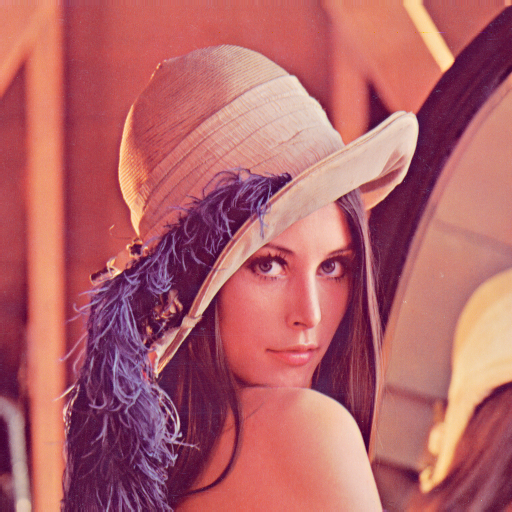

In [ ]:
from PIL import Image
# display image in colab
image_colored = Image.open("/content/Lenna_(test_image).png")
display(image_colored)

In [ ]:
print ( " Image Format : " , image_colored . format )
print ( " Image Size : " , image_colored . size )
print ( " Image Mode : " , image_colored . mode )

 Image Format :  PNG
 Image Size :  (512, 512)
 Image Mode :  RGB


In [ ]:
# Get the size (width , height ) and channels (RGB)
width , height = image_colored . size
channels = len( image_colored . getbands () ) # For RGB , it will be 3
print ( f" Image shape (RGB): ({ height } , { width } , { channels})")
image_size_colored = width * height *3
print ( f" Image size (RGB): { image_size_colored }")

 Image shape (RGB): (512 , 512 , 3)
 Image size (RGB): 786432


In [ ]:
import numpy as np
# Convert the Pillow image to a NumPy array
image_array_colored = np.array ( image_colored )
# Display the shape of the NumPy array (height , width ,channels )
print (" Shape of the image array :", image_array_colored .shape )

 Shape of the image array : (512, 512, 3)


 Shape of the image array : (512, 512, 3)
[[226 226 223 ... 230 221 200]
 [226 226 223 ... 230 221 200]
 [226 226 223 ... 230 221 200]
 ...
 [ 84  84  92 ... 173 172 177]
 [ 82  82  96 ... 179 181 185]
 [ 82  82  96 ... 179 181 185]]


array([[226, 226, 223, ..., 230, 221, 200],
       [226, 226, 223, ..., 230, 221, 200],
       [226, 226, 223, ..., 230, 221, 200],
       ...,
       [ 84,  84,  92, ..., 173, 172, 177],
       [ 82,  82,  96, ..., 179, 181, 185],
       [ 82,  82,  96, ..., 179, 181, 185]], dtype=uint8)
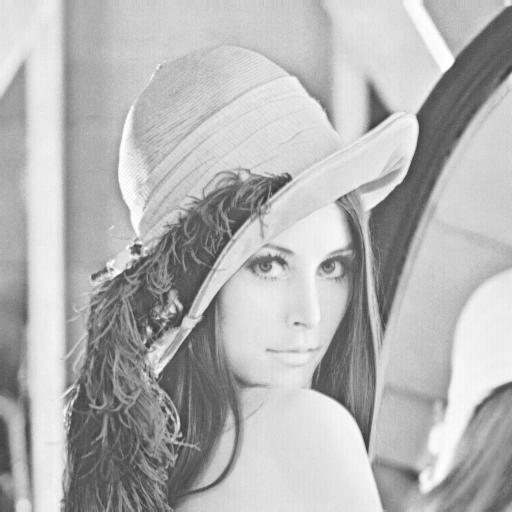

[[226 226 223 ... 230 221 200]
 [226 226 223 ... 230 221 200]
 [226 226 223 ... 230 221 200]
 ...
 [ 84  84  92 ... 173 172 177]
 [ 82  82  96 ... 179 181 185]
 [ 82  82  96 ... 179 181 185]]


array([[226, 226, 223, ..., 230, 221, 200],
       [226, 226, 223, ..., 230, 221, 200],
       [226, 226, 223, ..., 230, 221, 200],
       ...,
       [ 84,  84,  92, ..., 173, 172, 177],
       [ 82,  82,  96, ..., 179, 181, 185],
       [ 82,  82,  96, ..., 179, 181, 185]], dtype=uint8)
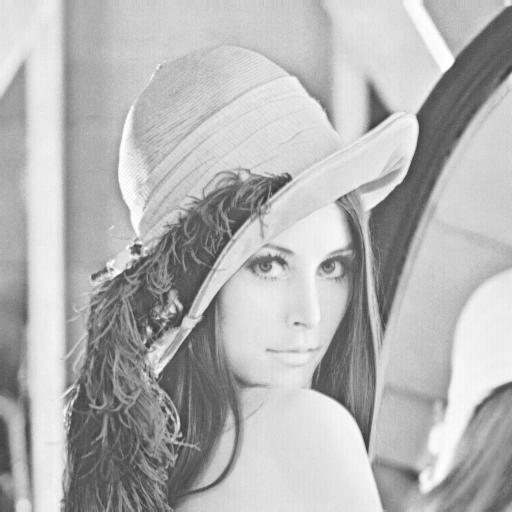

In [ ]:
# Convert the Pillow image to a NumPy array
image_array_colored = np . array ( image_colored )
# Display the shape of the NumPy array (height , width ,channels )
print (" Shape of the image array :", image_array_colored . shape)
#For Red Channels
red_channel = image_array_colored [: , : , 0] # Red channel
print ( red_channel )
display ( red_channel )
# For Green Channels
green_channel = image_array_colored [: , : , 0] # Green channel
print ( green_channel )
display ( green_channel )

[[125 125 133 ... 122 110  90]
 [125 125 133 ... 122 110  90]
 [125 125 133 ... 122 110  90]
 ...
 [ 60  60  58 ...  84  76  79]
 [ 57  57  62 ...  79  81  81]
 [ 57  57  62 ...  79  81  81]]


array([[125, 125, 133, ..., 122, 110,  90],
       [125, 125, 133, ..., 122, 110,  90],
       [125, 125, 133, ..., 122, 110,  90],
       ...,
       [ 60,  60,  58, ...,  84,  76,  79],
       [ 57,  57,  62, ...,  79,  81,  81],
       [ 57,  57,  62, ...,  79,  81,  81]], dtype=uint8)
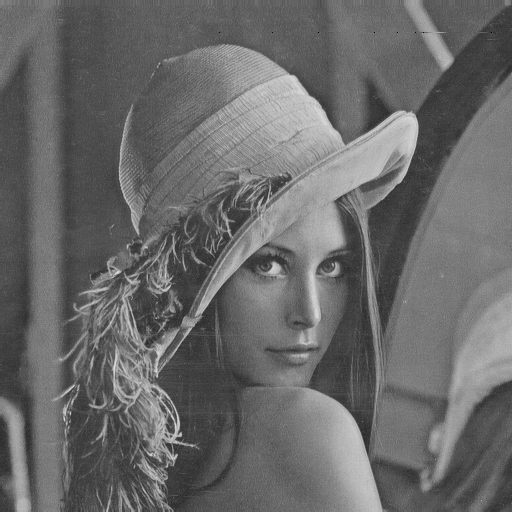

In [ ]:
# For Blue Channel :
blue_channel = image_array_colored [: , : , 2] # Blue channel
print ( blue_channel )
display ( blue_channel )

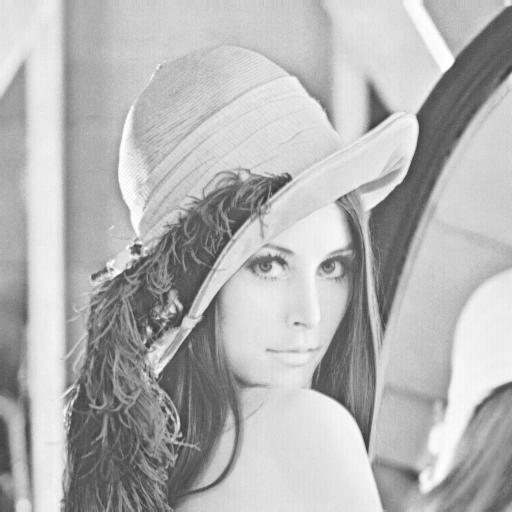

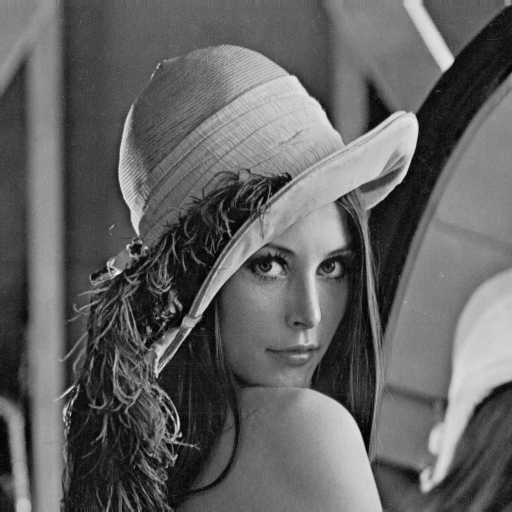

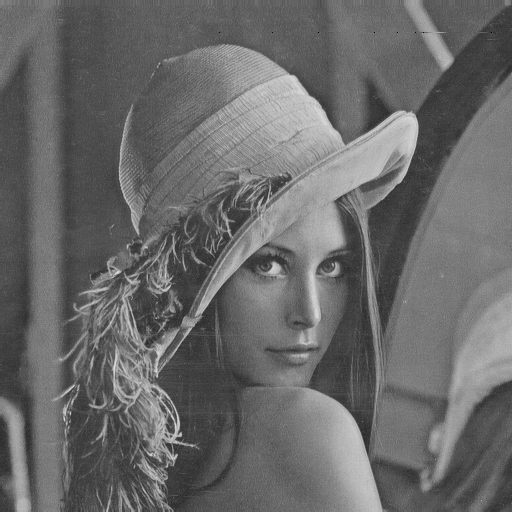

In [ ]:
# Assuming image_colored is already defined and loaded above
# Get the R, G, and B channels
r , g , b = image_colored . split ()
# Display or further process the individual channels
display ( r )
display ( g )
display ( b )

**2.7 Extracting Sub Images from an Image Array.**

In [ ]:
# Sample Implementation :
# Accessing a specific row - 100 th row
row_100 = image_array_colored [100 , : , :]
# Accessing a specific column - 50 th col
col_50 = image_array_colored [: , 50 , :]
# Accessing a specific pixel (row 10 , col 20)
pixel = image_array_colored [10 , 20 , :] # Gets RGB values at (10 ,20)

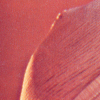

In [ ]:
# Define the cropping box (left , upper , right , lower )
left = 100
upper = 50
right = 200
lower = 150
# Crop the image
cropped_image = image_colored . crop (( left , upper , right ,
lower ) )
# Display the cropped image
display ( cropped_image )

In [ ]:
# Create a NumPy array (Here , we use a dummy array for illustration )
image_array = np . zeros ((100 , 100 , 3) , dtype = np . uint8 ) #Example : black image
# Convert the NumPy array back to a Pillow Image object
image_from_array = Image . fromarray ( image_array )
# Display the image
image_from_array . show ()
# Optionally save the image to a file
image_from_array.save("output_image.jpg")

**3**

In [ ]:
import numpy as np
import matplotlib . pyplot as plt
from PIL import Image
# Load image and convert to grayscale
image = Image.open ("/content/cameraman.png").convert ("L")
# Convert to NumPy array
image_array = np . array ( image )
# Get image dimensions
height , width = image_array . shape
# Reshape the image into a 2D array where each row represents a row of pixels
# This allows PCA to process each row as an observation and find patterns across pixel intensities
data = image_array . reshape ( height , width )

step **1**

In [ ]:
# Compute the mean of each column ( feature )
mean = np . mean ( data , axis =0)
# Subtract mean to center the data
centered_data = data - mean

step **2**

In [ ]:
# Compute covariance matrix
cov_matrix = np . cov ( centered_data , rowvar = False )

step **3**

In [ ]:
# Compute eigenvalues and eigenvectors
eigenvalues , eigenvectors = np . linalg . eigh ( cov_matrix )
# Sort eigenvalues and corresponding eigenvectors indescending order
sorted_indices = np . argsort ( eigenvalues ) [:: -1]
eigenvalues = eigenvalues [ sorted_indices ]
eigenvectors = eigenvectors [: , sorted_indices ]

**3.2**

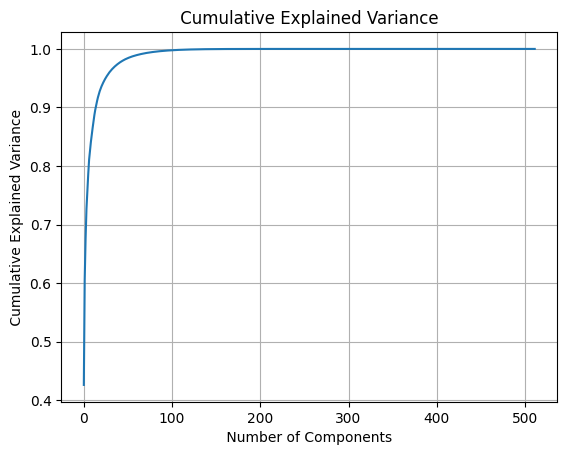

In [ ]:
# Plot the explained variance ratio
explained_variance_ratio = eigenvalues / np .sum ( eigenvalues )
plt . plot ( np . cumsum ( explained_variance_ratio ) )
plt . title (" Cumulative Explained Variance ")
plt . xlabel (" Number of Components ")
plt . ylabel (" Cumulative Explained Variance ")
plt . grid ( True )
plt . show ()

step **4**

In [ ]:
k = 50 # Choose k principal components
components = eigenvectors [: , : k ]

**step5**

In [ ]:
# Project the data onto the principal components
compressed_data = np . dot ( centered_data , components )

step **6**

In [ ]:
# Reconstruct the image from compressed data
decompressed_data = np.dot (compressed_data , components.T ) + mean

**step 7**

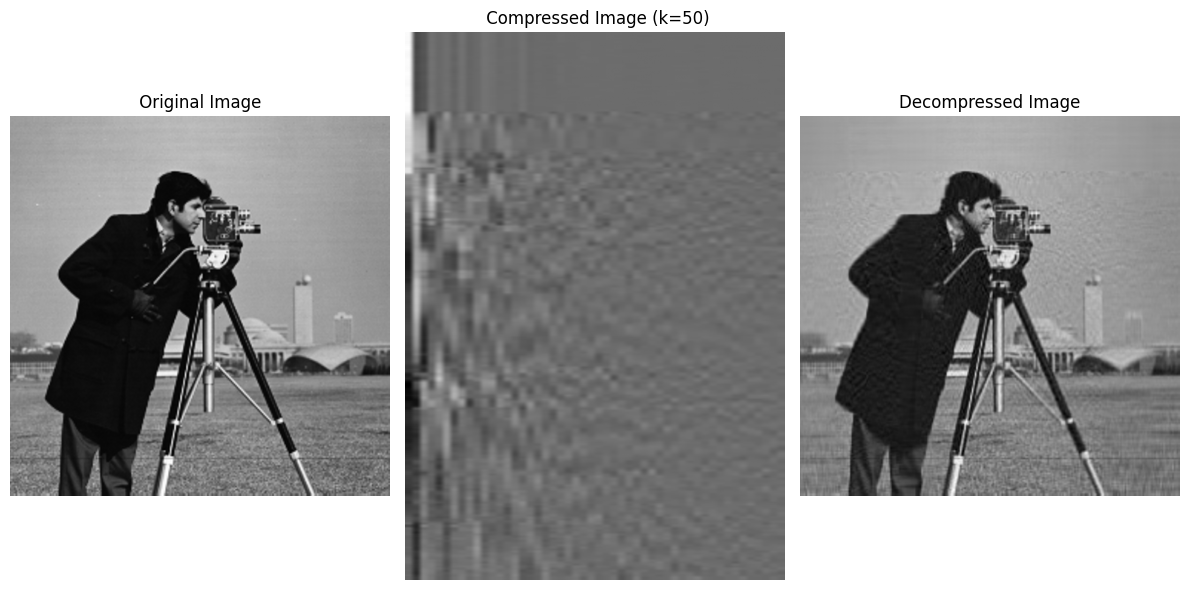

In [ ]:
plt . figure ( figsize =(12 , 6) )
# Original Image
plt . subplot (1 , 3 , 1)
plt . imshow (image_array , cmap ="gray")
plt . title (" Original Image ")
plt . axis ("off")
# Compressed Representation
plt . subplot (1 , 3 , 2)
plt . imshow (compressed_data , cmap ="gray", aspect ="auto")
plt . title ( f" Compressed Image (k={k})")
plt . axis ("off")
# Decompressed Image
plt . subplot (1 , 3 , 3)
plt . imshow (decompressed_data , cmap ="gray")
plt . title ("Decompressed Image")
plt . axis ("off")
plt . tight_layout ()
plt . show ()